In [1]:
import pennylane as qml

ModuleNotFoundError: No module named 'pennylane'

In [2]:
dev = qml.device("default.qubit", wires=2)

In [3]:
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)  # apply a Hadamard gate on qubit 0
    qml.CNOT(wires=[0, 1])  # apply CNOT from qubit 0 to 1

    return qml.counts()  # measure all qubits and return the counts

(<Figure size 500x300 with 1 Axes>, <Axes: >)

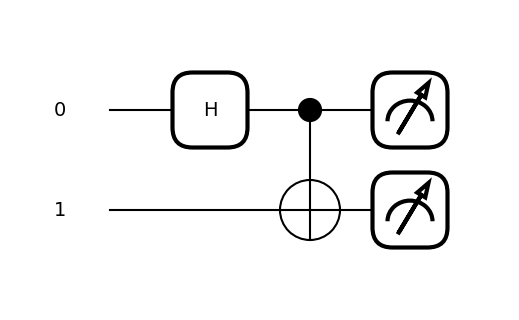

In [4]:
qml.drawer.use_style("black_white")
qml.draw_mpl(circuit)()  # plot the circuit diagram

In [5]:
counts = circuit(shots=8192)  # run circuit with 8192 shots
print(counts)

{'00': 4178, '11': 4014}


In [6]:
# convert from counts to probability estimates
probs = {}
for key, value in counts.items():
    probs[key] = value/8192
print(probs)

{'00': 0.510009765625, '11': 0.489990234375}


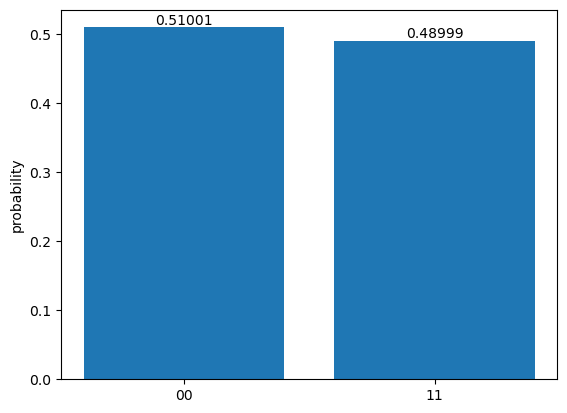

In [7]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
bars = ax.bar(probs.keys(), probs.values(), linewidth=1)
ax.bar_label(bars)
plt.ylabel("probability")
plt.savefig("BellState_simulator.pdf", format="pdf", bbox_inches="tight")
plt.show()